# Decoding Protein Networks In Thousands of Single Cancer Cells

### Protein Networks Group

Welcome to this exciting exploration of protein networks in single cancer cells! In this notebook, we will analyze data derived from iterative immunofluorescence, a cutting-edge technique that allows us to measure the amounts and spatial locations of proteins within individual cells. This approach is a powerful tool for decoding complex protein interactions and understanding cellular behavior, particularly in cancer biology.

The data you will be working with in this module was generated by the Brunk lab and the Pervis lab at UNC Chapel Hill.

## What is Iterative Immunofluorescence?

Iterative immunofluorescence is a cutting-edge technique used to study the abundance and spatial distribution of proteins within single cells. Here’s how it works:

1. **Staining the cells**: Antibodies specific to target proteins are tagged with fluorophores (light-emitting molecules) and applied to cells.
2. **Imaging**: Fluorescent signals from the tagged proteins are captured using microscopy.
3. **Washing and repeating**: The antibodies are washed off, and new sets of antibodies are applied. This process is repeated for multiple cycles, enabling the measurement of dozens of proteins in the same cells.

This approach allows us to study a wide array of proteins while maintaining their context within individual cells.

---

## Example Image of Single Cells with Labeled Proteins

In the image below, each **circle represents a single cell**. Within each cell:

- The **nucleus**, which holds all the cell’s DNA, is stained using a **blue-colored dye**.
- Two key proteins are simultaneously stained:
  - **MYC**: Stained using anti-bodies linked to **red-colored fluorophores**.
  - **BRD4**: Stained using anti-bodies linked to **green-colored fluorophores**.

### What Do MYC and BRD4 Do?
MYC and BRD4 are proteins that work together to regulate transcription, the process by which cells produce RNA from their DNA. This RNA expression influences hundreds of target genes critical for cellular function and adaptation. 

### Why Analyze These Proteins?
The relationship between the abundances of MYC and BRD4 within the same cell can provide valuable insights into cellular processes, including:
- Whether their levels are **correlated** (e.g., higher MYC might correspond to higher BRD4).
- How their interactions influence **gene regulation** and overall cellular behavior.

By examining this image and analyzing the data, we aim to uncover patterns in how these proteins work together in single cells. This understanding can shed light on key processes in both normal and cancerous cells.


In [1]:
from IPython.display import Image, display, HTML

# Display the image with custom size and centering
display(HTML('<div style="text-align: center;"><img src="4i.png" style="width:50%; height:auto;"></div>'))


## The Dataset

The dataset you will work with consists of measurements for **29 different proteins** collected from thousands of cancer cells. Each protein was:

- Detected using antibodies tagged with unique fluorophores.
- Measured iteratively through cycles of staining and imaging.

The data captures:

- **Protein abundance**: How much of each protein is present in a given cell.
- **Protein localization**: Where each protein is located in the cell (e.g., nucleus, cytoplasm, membrane).

This dataset provides a powerful opportunity to decode protein networks and uncover insights into cancer biology.

---

## Why Study Protein Networks?

Cancer cells are notoriously complex. They adapt and survive by reorganizing their protein networks, altering cellular signaling, and evading normal controls. Understanding these networks can reveal:

- **How proteins interact** to support cancer cell survival and growth.
- **Which proteins are central** to these processes, potentially identifying therapeutic targets.

In this notebook, you'll learn how to:

1. Explore the **iterative immunofluorescence dataset**.
2. Visualize and analyze **protein abundance across single cells**.
3. Decode patterns in **protein interactions** to uncover biological insights.

Let’s get started and unlock the secrets hidden within these protein networks!


#### Let's start by importing the libraries we will use in this notebook


In [2]:
# pandas: Helps us load, explore, and manipulate data tables
import pandas as pd

# seaborn: Makes it easy to create beautiful and informative plots
import seaborn as sns

# scipy: Provides statistical tools for analyzing data
from scipy import stats
import scipy

# matplotlib: Allows us to customize and display our plots
import matplotlib.pyplot as plt

# statannot: Adds statistical annotations (like p-values) to plots
from statannot import add_stat_annotation

# Optional: Configure pandas to display more rows and columns (so we can see more of the dataset at once)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Optional: Set a nice default style for plots
sns.set(style="whitegrid")

# Confirm to students that everything is ready
print("All libraries are imported, and we're ready to go!")


All libraries are imported, and we're ready to go!


## Loading the Data: Lung Cancer Cell Line

In this notebook, we will work with a dataset derived from a ** DepMap lung cancer cell line**. 

### What is a DepMap Cell Line?
- The cell line we are using here comes from a patient who had lung cancer.
- DepMap, stands for Dependency Map, is a huge repository that holds large-scale omics data for 2000 cell lines
- This cell line is widely used in research to study cancer biology, including protein networks and how cells respond to treatments.
- The dataset we'll load contains measurements from thousands of single cells, including protein abundances and other cellular features.

By analyzing this data, we can better understand how protein networks function in cancer cells.

Now, let's load the dataset and take a quick look at its structure!


In [3]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv('lung_cancer.csv', index_col=0)

# Display the first few rows to ensure it loaded correctly
print("Dataset loaded successfully! Here are the first few rows:")
df_cell.head()


Dataset loaded successfully! Here are the first few rows:


,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989,-0.426352,-0.661457,0.552717,0.289812,-0.649461,0.332243,-0.781621,-0.739925,-0.295508,-0.289053,-0.793799,0.237827,-0.965990,-0.56011

## Understanding the Dataset Structure

The dataset represents protein measurements from thousands of individual cancer cells. Here's what each part of the data means:

- **Rows**: Each row corresponds to a single cell. These are individual measurements of protein levels and localization for one specific cell.
- **Columns**: Each column corresponds to a specific protein measured during the experiment. The naming convention of the columns gives us important information about what was measured.

### Column Naming Convention
Each column name follows this structure:  
`<Iteration #>_<Protein Name>_<Localization>_mean`

- **Iteration # (e.g., 01, 02, etc.)**: Indicates the cycle of iterative immunofluorescence during which the protein was measured. Multiple cycles are used to measure different proteins in the same cells.
- **Protein Name (e.g., cMyc, BRD4, HER2)**: Specifies the protein being measured.
- **Localization (e.g., nuc, ring)**: Shows where the protein is located within the cell:
  - `nuc`: Nucleus (where the cell's DNA is housed).
  - `ring`: Cytoplasm, specifically the region around the nucleus (often referred to as the perinuclear region).
- **Mean**: Refers to the **mean fluorescence signal**. This is the average signal intensity from the fluorophores used to label that specific protein in the cell. It provides a quantitative measure of protein abundance.


## Exploring the Proteins Measured in Each Iteration

The dataset contains measurements from multiple iterations of immunofluorescence. Each iteration corresponds to a set of proteins measured in the same single cells. Let's query the dataset to see which proteins were measured in each iteration and where they are localized.


In [4]:
# Query the dataset to find the proteins measured in each iteration
total_proteins = []  # we create a list to keep track of the total proteins that were labeled

for j in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    print(f"Iteration {j} includes the following proteins:")
    for i in df_cell.columns:  # iterate over all columns in the dataset
        if j in i:
            print(i) # prints the column title
            tmp = i.split('_')[1]  # Extract the protein name only from the column title
            if tmp not in total_proteins:  #checks if the protein is already in the list
                total_proteins.append(tmp) # appends the protein name to the list
    print()  # Add a blank line for readability


Iteration 01 includes the following proteins:
01_cMyc_nuc_mean
01_BRD4_nuc_mean
01_CDK2_nuc_mean
01_cMyc_ring_mean
01_BRD4_ring_mean
01_CDK2_ring_mean

Iteration 02 includes the following proteins:
02_HER2_nuc_mean
02_CyclinD1_nuc_mean
02_EGFR_nuc_mean
02_HER2_ring_mean
02_CyclinD1_ring_mean
02_EGFR_ring_mean

Iteration 03 includes the following proteins:
03_FGFR2_nuc_mean
03_CDC6_nuc_mean
03_EZH2_nuc_mean
03_FGFR2_ring_mean
03_CDC6_ring_mean
03_EZH2_ring_mean

Iteration 04 includes the following proteins:
04_cMycS62_nuc_mean
04_FOXO1_nuc_mean
04_HER2_nuc_mean
04_cMycS62_ring_mean
04_FOXO1_ring_mean
04_HER2_ring_mean

Iteration 05 includes the following proteins:
05_cMycT58_nuc_mean
05_CyclinA_nuc_mean
05_CyclinB1_nuc_mean
05_cMycT58_ring_mean
05_CyclinA_ring_mean
05_CyclinB1_ring_mean

Iteration 06 includes the following proteins:
06_FOXO3A_nuc_mean
06_AKT_nuc_mean
06_ZEB1_nuc_mean
06_FOXO3A_ring_mean
06_AKT_ring_mean
06_ZEB1_ring_mean

Iteration 07 includes the following proteins:
07

## What Does This Tell Us?

- Each iteration focuses on measuring a specific subset of proteins.
- Proteins can be localized to different parts of the cell (e.g., nucleus vs. cytoplasm).
- The mean fluorescence intensity gives us insight into how much of a given protein is present in each cell.

By analyzing this dataset, we can uncover patterns in protein localization and abundance that provide valuable insights into cellular processes.


## Counting and Viewing the Total Number of Proteins

Now that we’ve explored the dataset structure and identified which proteins were measured, let’s calculate the total number of unique proteins in the dataset. 

We will also display the full list of these proteins to better understand what’s included in our data.

### Why Does This Matter?
Knowing the total number of proteins and their identities helps us:
- Understand the breadth of the dataset.
- Focus on specific proteins of interest.
- Design analyses to investigate protein abundance and localization patterns.

Let’s calculate this in the next cell.


In [5]:
# Calculate and display the total number of unique proteins
print("Total number of unique proteins measured in the dataset:", len(total_proteins))

# Display the list of unique proteins
print("\nList of unique proteins:")
total_proteins


Total number of unique proteins measured in the dataset: 29

List of unique proteins:


['cMyc',
 'BRD4',
 'CDK2',
 'HER2',
 'CyclinD1',
 'EGFR',
 'FGFR2',
 'CDC6',
 'EZH2',
 'cMycS62',
 'FOXO1',
 'cMycT58',
 'CyclinA',
 'CyclinB1',
 'FOXO3A',
 'AKT',
 'ZEB1',
 'pRb',
 'Rb',
 'p21',
 'CDT1',
 'MDM2',
 'SKP2',
 'mTOR',
 'TGFbeta',
 'E2F1',
 'cFOS',
 'CDH1',
 'cPARP']

## Protein List Explanation

The list of proteins measured in this dataset includes well-known regulators of cellular processes, such as:

- **MYC and BRD4**: Key transcriptional regulators that influence the expression of many genes.
- **HER2 and EGFR**: Proteins often associated with growth signaling pathways in cancer.
- **EZH2 and Cyclins (A, B1, D1)**: Proteins involved in chromatin remodeling and cell cycle regulation.
- **FOXO1 and FOXO3A**: Transcription factors involved in cell stress responses.

This diverse set of proteins allows us to explore how cancer cells coordinate complex networks to adapt and survive. Feel free to explore this list further to identify proteins of interest for specific analyses.


_____________________________________________

# Analysis: Exploring Protein Networks and Cellular Behavior

In this section, we will investigate several key questions using statistical and computational approaches. These questions aim to deepen our understanding of protein interactions, network dynamics, and their implications in cancer biology. The insights gained here will serve as the foundation for applying advanced techniques in the final modules of this tutorial.

### Overarching Questions to Explore In This Tutorial
1. **Protein Relationships**:
   - How do these proteins correlate with one another across cells?

2. **Protein Networks**:
   - Are there any networks or hubs that form between select proteins in some cells versus others?

3. **DNA Copy Number Associations**:
   - Some cells have very different DNA copy numbers than others. Can you figure out which proteins might be associated with these higher DNA copies?

4. **HER2 Status and Protein Expression**:
   - Are there significant differences in protein expression between high HER2 and low HER2 cells?

5. **Predictive Relationships**:
   - Can we predict HER2 status based on the expression of other proteins? What about other proteins?

6. **Variance Across Subpopulations**:
   - Do certain proteins exhibit higher variability across cells?

7. **Protein Localization**:
   - Do nuclear and cytoplasmic levels of certain proteins differ significantly?

For each question, we will use appropriate methods such as correlation analysis, statistical tests, or machine learning to analyze the data and draw conclusions.


## Statistical Methods for Exploring Protein Expression and HER2 Associations

When analyzing the relationship between protein expression and HER2 status (e.g., high HER2 vs. low HER2), several statistical methods can be applied depending on the nature of the data and the question being asked. Below are some commonly used methods:

### 1. **t-test**
- **Purpose**: Compares the means of two groups (e.g., high HER2 vs. low HER2).
- **Use Case**: Determine if a specific protein is expressed at significantly different levels between the two groups.
- **Assumption**: Data is normally distributed and variances are equal.

### 2. **Mann-Whitney U Test**
- **Purpose**: Compares the medians of two groups.
- **Use Case**: Useful if the data is not normally distributed or contains outliers.
- **Non-Parametric**: Does not assume a normal distribution.

### 3. **ANOVA (Analysis of Variance)**
- **Purpose**: Tests if there are significant differences among the means of more than two groups or conditions.
- **Use Case**: If HER2 groups are divided into more than two categories (e.g., high, middle, low), use ANOVA to assess differences.
- **Follow-Up**: If significant, use post-hoc tests to identify which groups differ.

### 4. **Chi-Square Test**
- **Purpose**: Tests for associations between categorical variables.
- **Use Case**: If you classify proteins or HER2 status into categories, use this test to assess relationships.

### 5. **Logistic Regression**
- **Purpose**: Predicts the probability of a binary outcome (e.g., high HER2 vs. low HER2) based on one or more predictors.
- **Use Case**: Identify proteins that are strong predictors of HER2 status.

### 6. **Correlation Analysis**
- **Purpose**: Measures the strength and direction of the relationship between two continuous variables.
- **Use Case**: Explore the relationship between protein expressions or between protein expression and HER2 intensity.

### 7. **Machine Learning Methods**
- **Purpose**: Classifies cells based on HER2 expression or identifies complex patterns in the data.
- **Techniques**:
  - **Random Forest**: Identifies important predictors (e.g., proteins) for classifying HER2 status.
  - **Support Vector Machines**: Finds the best boundary to separate high HER2 vs. low HER2 cells.
  - **Neural Networks**: Captures complex, non-linear relationships in the data.
- **Use Case**: Build predictive models to classify HER2 status using protein expression as features.

---

### Which Method to Use?
- **For two groups**: Use a t-test or Mann-Whitney U test.
- **For more than two groups**: Use ANOVA.
- **For categorical data**: Use a Chi-Square Test.
- **For predictions**: Use Logistic Regression or Machine Learning.
- **For relationships**: Use Correlation Analysis.

Choose the method based on your research question, the type of data, and its distribution.


_________________

## Question 1: Protein Abundance Correlations

**How do these proteins correlate with one another across cells?**

We can calculate correlation coefficients (e.g., Pearson or Spearman) to explore the relationships between different proteins across cells. These correlations help us identify proteins that tend to increase or decrease together in their expression levels.

For example, consider the proteins MYC and BRD4: if MYC expression is high in cells where BRD4 expression is also high, they would exhibit a strong positive correlation. Conversely, if MYC expression is high when BRD4 expression is low, they would show a negative correlation. By examining these patterns across the dataset, we can uncover potential functional relationships or shared regulatory mechanisms between proteins.


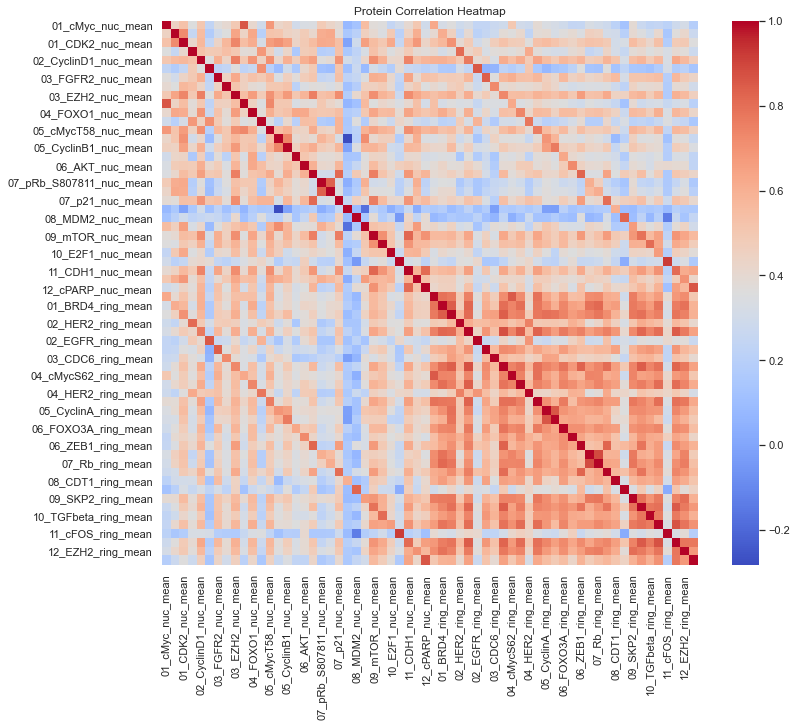

In [6]:
# Calculate correlation matrix for the dataset
correlation_matrix = df_cell.corr(method='pearson')  # Replace 'pearson' with 'spearman' if needed

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Protein Correlation Heatmap')
plt.show()


## Questions to Explore from the Correlation Heatmap

The correlation heatmap shows how strongly the expression levels of different proteins are related to each other across the dataset. Here are some basic questions to guide your analysis:

1. **General Protein Relationships**:
   - Which pairs of proteins show the strongest positive correlations (close to +1)?
   - Which pairs of proteins show the strongest negative correlations (close to -1)?
   - Are there any proteins that have weak correlations (close to 0) with most other proteins?

2. **HER2-Specific Analysis**:
   - Are there any proteins that show a very strong relationship with HER2 across the dataset?

3. **Compartment-Specific Patterns**:
   - Do proteins in the nucleus (e.g., `*_nuc_mean`) correlate strongly with each other?
   - Do cytoplasmic proteins (e.g., `*_ring_mean`) show similar patterns of correlation?

4. **Clusters and Patterns**:
   - Are there groups of proteins that show similar correlation patterns? 
   - What might these patterns tell us about how these proteins work together?

---

### Next Steps:
- Use the heatmap to identify interesting patterns or relationships.
- Pick a few specific proteins (like HER2) and investigate their correlations in more detail.


____________________

## Question 2: Proteins that Cluster

**Are there any networks or hubs that form between select proteins in some cells versus others?**

### Concept:
Using clustering or network analysis, we can identify groups of proteins that frequently interact or form hubs. These clusters or hubs represent proteins that may work together in the cell, playing coordinated roles in processes like signaling, cell division, or stress response.

### Example:
- **MYC** and **BRD4**:
  - These proteins are often associated with gene regulation. If we find that they are part of a tightly connected cluster in a protein interaction network, it might suggest that they are co-regulated or work together to control gene expression.

- **HER2**:
  - In cancer cells, HER2 might act as a hub, connecting with many other proteins involved in growth and survival pathways. This could explain why HER2 is often associated with aggressive cancer behavior.

### Biological Relevance:
By examining these patterns:
1. We can uncover relationships unique to specific cellular states, such as:
   - Normal vs. cancerous cells.
   - High vs. low HER2 expression levels.
2. This information provides insights into how proteins collaborate to sustain cellular function and can point to potential therapeutic targets.


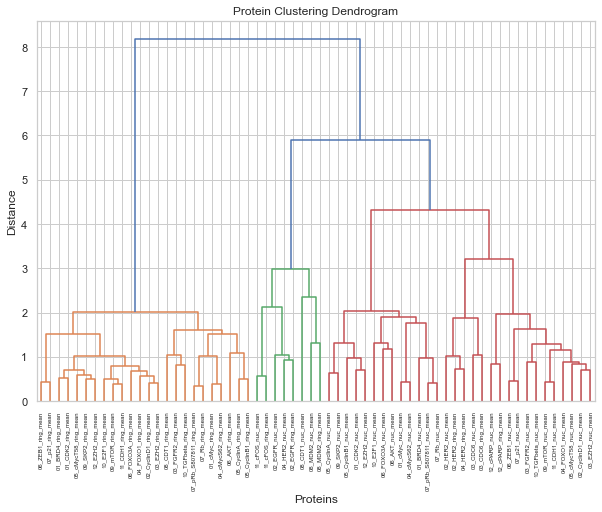

In [7]:
# Example: Use a hierarchical clustering dendrogram to visualize protein clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title('Protein Clustering Dendrogram')
plt.xlabel('Proteins')
plt.ylabel('Distance')
plt.show()


## Questions to Explore After the Clustering Analysis

1. **General Observations**:
   - Which proteins are grouped closely together in the dendrogram? 
   - What might this suggest about their relationship or function?

2. **Cluster Analysis**:
   - Are there distinct clusters of proteins that stand out? How many clusters do you observe?
   - Pick one cluster and list the proteins in it. What do these proteins have in common (e.g., compartmental localization, known pathways)?

3. **Biological Relevance**:
   - Does the clustering align with what you know about the biological roles of these proteins?
   - For example, are nuclear proteins (e.g., `*_nuc_mean`) clustering separately from cytoplasmic proteins (e.g., `*_ring_mean`)?

4. **HER2-Specific Questions**:
   - Which proteins cluster closely with HER2? What might this suggest about their interaction or co-regulation?

5. **Iterative Comparison**:
   - Are there any patterns or clusters unique to HER2 for Iteration 02 vs. Iteration 04?
   - What about for other proteins that appear in more than one iteration?

6. **Distance Metrics**:
   - The dendrogram shows the "distance" between proteins. What does a shorter distance mean compared to a longer one?
   - Which protein pairs or clusters have the shortest distances? Why do you think this is the case?

---

### Suggested Next Steps:
- Use the dendrogram to identify clusters and explore their biological significance.
- Pick a specific cluster or protein of interest and investigate its role in the dataset or its known biological function.


______________________

# Question 3: Investigating DNA-Protein Relationships

## Background:
HER2, MYC, and CDC6 are known to exhibit extreme copy number variation (CNV) at the gene level in this cell line. Your goal is to investigate whether these proteins show distinct patterns or signals at the protein level in this dataset.

## Questions to Explore:
1. **Variance and Magnitude**:
   - Which of these proteins shows the highest variance or the largest magnitude of difference in expression levels?
   - How do these patterns compare between HER2, MYC, and CDC6?

2. **Expression Distributions**:
   - How do the expression distributions of HER2, MYC, and CDC6 differ from each other?
   - Are there any proteins with similar distribution patterns to these three?

3. **Correlation Analysis**:
   - Which proteins show the strongest correlations with HER2, MYC, and CDC6?
   - Do these correlations align with known biological relationships?

4. **Compartmental Localization**:
   - Are there differences in the expression of HER2, MYC, and CDC6 between the nucleus and cytoplasm?
   - Does compartmental localization provide any clues about their functional roles?

5. **Open Exploration**:
   - Do HER2, MYC, and CDC6 exhibit other unique characteristics in this dataset that stand out to you?
   - Can you hypothesize how their protein-level behavior might relate to their extreme gene CNV?

## Deliverables:
- Summarize your findings for each question.
- Create visualizations to support your analysis (e.g., variance plots, correlation heatmaps, boxplots).
- Provide a short interpretation of your results for each question.


## Example Analysis: Variance and Magnitude of Protein Expression

### Purpose:
In this example, we calculate:
1. **Variance**: To identify proteins with the most variability in expression levels across cells.
2. **Magnitude of Difference**: To determine proteins with the largest range of expression (difference between maximum and minimum values).

We then compare the top proteins identified by these metrics to a list of proteins known to have extreme DNA copy number variation effects (e.g., HER2, MYC, CDC6). This helps us explore whether high variance or large magnitudes at the protein level align with extreme gene-level copy number variations.

### How to Interpret:
- **Top Proteins by Variance**: Proteins with high variability may indicate dynamic or regulated expression across cells.
- **Top Proteins by Magnitude**: Proteins with large expression ranges might reflect biological processes or experimental conditions causing extreme differences.
- **Overlap with DNA Copy Number Effects**: If the top proteins by variance or magnitude overlap with known DNA copy number proteins, this supports the hypothesis that CNV influences protein-level behavior.

Feel free to use this code as a guide and adapt it to explore other proteins or metrics of interest!


In [8]:
import pandas as pd

# Load in your data set
data = df_cell.iloc[:, :-3]  # Exclude the last 3 columns from the dataset

# List of proteins known to have DNA copy number effects
dna_copy_number_proteins = ['HER2', 'MYC', 'CDC6']  # Replace with your specific proteins

# Calculate variance across all proteins
protein_variances = data.var().sort_values(ascending=False)

# Calculate the absolute magnitude of difference between min and max values for each protein
protein_magnitudes = (data.max() - data.min()).sort_values(ascending=False)

# Combine results into a single DataFrame for comparison
results = pd.DataFrame({
    'Variance': protein_variances,
    'Magnitude': protein_magnitudes
})

# Sort the DataFrame to identify top proteins
top_variance_proteins = results.sort_values(by='Variance', ascending=False).head(10)
top_magnitude_proteins = results.sort_values(by='Magnitude', ascending=False).head(10)

# Check if top proteins overlap with those known to have DNA copy number effects
top_variance_overlap = set(top_variance_proteins.index).intersection(dna_copy_number_proteins)
top_magnitude_overlap = set(top_magnitude_proteins.index).intersection(dna_copy_number_proteins)

# Print results
print("Top 10 proteins by variance:")
print(top_variance_proteins)
print("\nTop 10 proteins by magnitude of difference:")
print(top_magnitude_proteins)


Top 10 proteins by variance:
                     Variance  Magnitude
11_cFOS_ring_mean    0.433708   3.058815
03_CDC6_ring_mean    0.422806   3.160205
08_CDT1_nuc_mean     0.418118   3.175236
02_HER2_ring_mean    0.396461   3.239731
05_CyclinA_nuc_mean  0.390042   3.340116
02_HER2_nuc_mean     0.386240   3.287493
11_cFOS_nuc_mean     0.376647   3.152320
02_EGFR_nuc_mean     0.372222   3.143532
02_EGFR_ring_mean    0.345563   3.145317
03_CDC6_nuc_mean     0.345371   3.281522

Top 10 proteins by magnitude of difference:
                         Variance  Magnitude
07_Rb_nuc_mean           0.307172   3.504945
06_AKT_nuc_mean          0.275939   3.500587
05_CyclinB1_nuc_mean     0.297738   3.482521
07_pRb_S807811_nuc_mean  0.322112   3.466824
06_FOXO3A_nuc_mean       0.334040   3.458335
07_p21_nuc_mean          0.218017   3.454833
06_ZEB1_nuc_mean         0.247487   3.380655
06_AKT_ring_mean         0.306648   3.353379
05_CyclinA_nuc_mean      0.390042   3.340116
09_mTOR_nuc_mean         

_____________________

## Question 4: Proteins Measured by More Than One Antibody

In this dataset, some proteins are measured using **different antibodies in different iterations of the experiment**. For example:
- The protein **HER2** is measured in **Iteration 02** with one antibody and in **Iteration 04** with a different antibody.

### Why Measure the Same Protein with Two Different Antibodies?
1. **Consistency and Validation**:
   - Measuring the same protein with different antibodies helps ensure the data is reliable.
   - Consistent results across antibodies confirm that both are effectively detecting the same protein.

2. **Capturing Different Protein Features**:
   - Different antibodies may target distinct regions or modifications of the same protein.
   - This allows us to study specific aspects of the protein, such as post-translational modifications.

3. **Biological Insights**:
   - Discrepancies between measurements could reflect important biological differences, such as variations in protein isoforms or localization patterns.

### What to Do?
- Find the proteins that are measured by more than one antibody.
- Think critically about why these proteins were chosen for repeated measurement and what biological or technical insights this provides.

Next, let’s write some code to identify proteins measured by multiple antibodies.


In [9]:
# Find proteins measured in more than one iteration
from collections import defaultdict

data = df_cell  # Use the main dataset

# Create a dictionary to store proteins and the unique iterations in which they are measured
protein_to_iterations = defaultdict(set)  # Use a set to store unique iterations

# Loop through the dataset columns to extract protein names and iterations
for col in data.columns:
    if '_' in col:  # Ensure column name follows the format (e.g., 02_HER2_nuc_mean)
        iteration = col.split('_')[0]  # Extract iteration (e.g., '02')
        protein = col.split('_')[1]    # Extract protein name (e.g., 'HER2')
        protein_to_iterations[protein].add(iteration)  # Add the iteration to the set

# Find proteins measured in more than one unique iteration
duplicate_proteins = {protein: sorted(iterations) for protein, iterations in protein_to_iterations.items() if len(iterations) > 1}

# Print results
print("Proteins measured by more than one antibody:")
for protein, iterations in duplicate_proteins.items():
    print(f"{protein}: Measured in iterations {', '.join(iterations)}")


Proteins measured by more than one antibody:
HER2: Measured in iterations 02, 04
EZH2: Measured in iterations 03, 12


## Analysis of Variance: Example with HER2

### 1. Compute Variance

In [10]:
# Calculate variances for HER2 in cytoplasm and nucleus
variance_her2_nuc = data['02_HER2_nuc_mean'].var()
variance_her2_ring = data['02_HER2_ring_mean'].var()

# Print variances
print(f"HER2 Nuclear Variance: {variance_her2_nuc}")
print(f"HER2 Cytoplasmic Variance: {variance_her2_ring}")


HER2 Nuclear Variance: 0.3862400228053978
HER2 Cytoplasmic Variance: 0.39646130555926745


### 2. Calculate F-statistic

In [11]:
from scipy.stats import f_oneway

# F-test for HER2
f_stat_her2, p_val_her2 = f_oneway(data['02_HER2_nuc_mean'], data['02_HER2_ring_mean'])
print(f"F-statistic for HER2: {f_stat_her2}, p-value: {p_val_her2}")


F-statistic for HER2: 20.99846172394269, p-value: 4.611050187753503e-06


## Understanding the F-Statistic

### What is the F-Statistic?
The F-statistic is a value used in statistical tests to compare the variability between groups to the variability within groups. It helps us determine whether the differences we observe between groups are statistically significant.

---

### Key Concepts:
1. **Between-Group Variability**:
   - Measures how much the means of the groups differ from each other.
   - A larger difference in means leads to higher between-group variability.

2. **Within-Group Variability**:
   - Measures how much individual data points differ within each group.
   - Smaller differences within groups lead to lower within-group variability.

3. **The F-Statistic Formula**:

   F = Variance Between Groups / Variance Within Groups

- A higher F-statistic suggests that the group means are significantly different relative to the variability within the groups.

---

### Why Use the F-Statistic?
The F-statistic is used in:
- **ANOVA (Analysis of Variance)**: To test whether there are significant differences between the means of multiple groups.
- **Regression Analysis**: To test whether the model explains a significant amount of variability in the data.

---

### Example:
Suppose we are comparing protein expression levels across three groups of cells:
1. **High HER2**
2. **Low HER2**
3. **Control**

- If the group means are very different (e.g., High HER2 cells have much higher protein expression), the **between-group variability** will be large.
- If the expression levels within each group are consistent, the **within-group variability** will be small.
- This combination will result in a high F-statistic, indicating that the differences between groups are statistically significant.

---

### Takeaway:
The F-statistic is a ratio that tells us how much of the observed variation in the data is due to differences between groups versus random variation within groups. It’s a powerful tool for comparing multiple groups and understanding their relationships.


### 3. Plot results

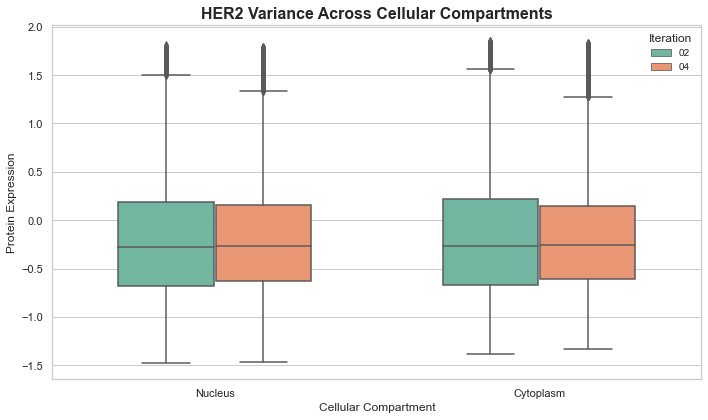

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a tidy DataFrame for Seaborn (no `id_vars` since we don't need the index)
tidy_data = pd.melt(data, 
                    value_vars=['02_HER2_nuc_mean', '02_HER2_ring_mean', '04_HER2_nuc_mean', '04_HER2_ring_mean'],
                    var_name='Location', value_name='Expression')

# Map compartments and iterations for readability
tidy_data['Iteration'] = tidy_data['Location'].apply(lambda x: '02' if '02' in x else '04')
tidy_data['Compartment'] = tidy_data['Location'].apply(lambda x: 'Nucleus' if 'nuc' in x else 'Cytoplasm')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=tidy_data, x='Compartment', y='Expression', hue='Iteration', palette='Set2', width=0.6)

# Add a title and labels
plt.title("HER2 Variance Across Cellular Compartments", fontsize=16, weight='bold')
plt.ylabel("Protein Expression", fontsize=12)
plt.xlabel("Cellular Compartment", fontsize=12)

# Improve legend placement and aesthetics
plt.legend(title='Iteration', fontsize=10, title_fontsize=12, loc='upper right', frameon=False)

# Tighten layout
plt.tight_layout()
plt.show()


### 4. Compute p-values

In [13]:
from scipy.stats import ttest_ind, wilcoxon

# Compare nucleus and cytoplasm within each iteration
results = {}

# Iteration 02: Nucleus vs. Cytoplasm
nuc_02 = data['02_HER2_nuc_mean']
ring_02 = data['02_HER2_ring_mean']
t_stat_02, p_value_02 = ttest_ind(nuc_02, ring_02, equal_var=False)
results['Iteration 02 (Nucleus vs Cytoplasm)'] = (t_stat_02, p_value_02)

# Iteration 04: Nucleus vs. Cytoplasm
nuc_04 = data['04_HER2_nuc_mean']
ring_04 = data['04_HER2_ring_mean']
t_stat_04, p_value_04 = ttest_ind(nuc_04, ring_04, equal_var=False)
results['Iteration 04 (Nucleus vs Cytoplasm)'] = (t_stat_04, p_value_04)

# Compare nucleus values between iterations (02 vs. 04)
t_stat_nuc, p_value_nuc = ttest_ind(nuc_02, nuc_04, equal_var=False)
results['Nucleus (Iteration 02 vs 04)'] = (t_stat_nuc, p_value_nuc)

# Compare cytoplasm values between iterations (02 vs. 04)
t_stat_ring, p_value_ring = ttest_ind(ring_02, ring_04, equal_var=False)
results['Cytoplasm (Iteration 02 vs 04)'] = (t_stat_ring, p_value_ring)

# Print results
for comparison, (t_stat, p_value) in results.items():
    print(f"{comparison}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")


Iteration 02 (Nucleus vs Cytoplasm): t-statistic = -4.5824, p-value = 4.6111e-06
Iteration 04 (Nucleus vs Cytoplasm): t-statistic = -1.4360, p-value = 1.5102e-01
Nucleus (Iteration 02 vs 04): t-statistic = -2.8154, p-value = 4.8737e-03
Cytoplasm (Iteration 02 vs 04): t-statistic = 0.6442, p-value = 5.1943e-01


### 5. Print results from multiple comparisons

In [14]:
from statsmodels.stats.multitest import multipletests

# Collect p-values for multiple comparisons
p_values = [p_value_02, p_value_04, p_value_nuc, p_value_ring]

# Apply Bonferroni correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Print corrected p-values
print("\nCorrected p-values (Bonferroni):")
for comparison, corrected_p in zip(results.keys(), corrected_p_values):
    print(f"{comparison}: corrected p-value = {corrected_p:.4e}")



Corrected p-values (Bonferroni):
Iteration 02 (Nucleus vs Cytoplasm): corrected p-value = 1.8444e-05
Iteration 04 (Nucleus vs Cytoplasm): corrected p-value = 6.0410e-01
Nucleus (Iteration 02 vs 04): corrected p-value = 1.9495e-02
Cytoplasm (Iteration 02 vs 04): corrected p-value = 1.0000e+00


## Interpretation of Corrected p-values (Bonferroni)

### Corrected p-values:
- **Iteration 02 (Nucleus vs Cytoplasm):** corrected p-value = 1.8444e-05
- **Iteration 04 (Nucleus vs Cytoplasm):** corrected p-value = 6.0410e-01
- **Nucleus (Iteration 02 vs 04):** corrected p-value = 1.9495e-02
- **Cytoplasm (Iteration 02 vs 04):** corrected p-value = 1.0000e+00

---

### Interpretation of Results:

#### 1. **Iteration 02 (Nucleus vs Cytoplasm)**
- **Corrected p-value = 1.8444e-05 (significant)**
  - The difference in HER2 expression between the nucleus and cytoplasm is highly significant in Iteration 02.
  - This suggests a strong localization preference or variability in HER2 distribution between these compartments during this condition.
  - **Conclusion**: HER2 is unevenly distributed between the nucleus and cytoplasm in Iteration 02.

---

#### 2. **Iteration 04 (Nucleus vs Cytoplasm)**
- **Corrected p-value = 6.0410e-01 (not significant)**
  - The difference in HER2 expression between the nucleus and cytoplasm is **not significant** in Iteration 04.
  - This indicates that HER2 expression levels in the nucleus and cytoplasm are more comparable during this condition.
  - **Conclusion**: There is no evidence of significant localization differences for HER2 between compartments in Iteration 04.

---

#### 3. **Nucleus (Iteration 02 vs Iteration 04)**
- **Corrected p-value = 1.9495e-02 (significant)**
  - The HER2 expression levels in the nucleus differ significantly between Iteration 02 and Iteration 04.
  - This suggests a potential change in nuclear HER2 levels across experimental conditions.
  - **Conclusion**: Nuclear HER2 expression is condition-dependent and differs between the two iterations.

---

#### 4. **Cytoplasm (Iteration 02 vs Iteration 04)**
- **Corrected p-value = 1.0000e+00 (not significant)**
  - The HER2 expression levels in the cytoplasm are **not significantly different** between Iteration 02 and Iteration 04.
  - This implies that cytoplasmic HER2 levels remain relatively stable across the two conditions.
  - **Conclusion**: Cytoplasmic HER2 expression does not vary significantly between iterations.

---

### Summary of Findings:
- **Significant Findings**:
  - HER2 distribution is uneven between compartments in Iteration 02.
  - Nuclear HER2 expression differs significantly between Iteration 02 and Iteration 04.
- **Stable Findings**:
  - HER2 distribution between nucleus and cytoplasm is similar in Iteration 04.
  - Cytoplasmic HER2 expression remains consistent across iterations.

---

### Biological Interpretation:
1. **Dynamic Nuclear HER2**:
   - The significant difference in nuclear HER2 levels between iterations may indicate condition-dependent regulation or localization of HER2.
2. **Stable Cytoplasmic HER2**:
   - The consistent cytoplasmic HER2 levels suggest that HER2’s role in the cytoplasm is maintained across conditions.
3. **Iteration-Specific Behavior**:
   - The strong compartmental localization in Iteration 02 (but not Iteration 04) may reflect experimental or biological factors affecting HER2’s behavior.

### Further Questions:
- What conditions differ between Iterations 02 and 04 that could explain the observed differences?
- Does HER2 localization in the nucleus correlate with any other cellular processes or markers?


# Try on your own: Statistical Analysis of Variance

#### Goals:
1. Compute the variance for EZH2 protein expression in the cytoplasm (`ring`) and nucleus (`nuc`).
2. Compare variances using statistical tests:
   - **F-test**: To compare variances between compartments for each protein.
   - **Levene’s Test**: To compare variances across both proteins and compartments.
3. Visualize the data:
   - Create boxplots to compare HER2 and EZH2 localization patterns.
   - Generate scatterplots to explore the relationship between cytoplasmic and nuclear expression.

#### Key Questions:
- Which protein shows greater variability in its localization between the nucleus and cytoplasm?
- Are the differences in variance statistically significant?



# Try on your own: Correlation and Biological Interpretation

#### Goals:
1. Analyze the correlation between cytoplasmic (`ring`) and nuclear (`nuc`) measurements for HER2 and EZH2.
2. Compare the strength of the correlations:
   - Does HER2 or EZH2 show a stronger compartmental relationship?
3. Interpret findings in the context of protein localization and biological function:
   - What do the variances and correlations suggest about the roles of HER2 and EZH2 in these compartments?

#### Key Questions:
- Does HER2 exhibit a stronger correlation between cytoplasmic and nuclear localization compared to EZH2?
- What biological insights can we draw from the differences in variance and correlation?


______________________________

## Question 5: Understand Protein Relationships with HER2

In this analysis, protein expression is measured in two distinct cellular compartments:
1. **The nucleus** (`nuc`): Where the DNA resides and much of the gene regulation occurs.
2. **The perinuclear region (cytoplasm)** (`ring`): The area surrounding the nucleus, often involved in signaling and protein trafficking.

### We Will Combine These Measurements... but Why?
- By averaging the measurements from the nucleus and the perinuclear region, we:
  - **Capture the overall protein expression** across both compartments.
  - Reduce noise from compartment-specific variability to create a more robust **combined intensity** value for each cell.
- This combined value allows us to analyze:
  - How the protein is distributed between the nucleus and the perinuclear region.
  - The variability in protein expression across cells and conditions.

Let’s compute the combined values for HER2 for two conditions (`02` and `04`) and add them to our dataset.


In [15]:
# Combining HER2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined HER2 intensities
combined_HER2_intensity_02 = []
combined_HER2_intensity_04 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the HER2 conditions for each fluorophore/antibody, for iteration 2 and 4
conditions_02 = ['02_HER2_nuc_mean', '02_HER2_ring_mean']
conditions_04 = ['04_HER2_nuc_mean', '04_HER2_ring_mean']

# Compute combined HER2 intensities for iteration 02
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '02_HER2_nuc_mean'] + data.loc[i, '02_HER2_ring_mean']) / 2
    combined_HER2_intensity_02.append(tmp)

# Compute combined HER2 intensities for iteration 04
for i in data.index:
    tmp = (data.loc[i, '04_HER2_nuc_mean'] + data.loc[i, '04_HER2_ring_mean']) / 2
    combined_HER2_intensity_04.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['02_HER2_combined'] = combined_HER2_intensity_02
data['04_HER2_combined'] = combined_HER2_intensity_04

# Display the first few rows to verify the new columns
print("Updated dataset with combined HER2 intensities:")
data[['02_HER2_combined', '04_HER2_combined']].head()


Updated dataset with combined HER2 intensities:


,02_HER2_combined,04_HER2_combined
index_column,,
cell_24,1.157840,-0.911579
cell_31,0.653404,-0.705692
cell_36,0.255300,-0.594384
cell_43,-0.406528,-0.980865
cell_51,0.310104,0.153675


## Understanding Combined HER2 Intensities

By combining the measurements from two fluorophores, we can answer several questions:
1. **How consistent are protein abundance in nuclei vs cytoplasm?**
   - The difference between nuclear and cytoplasmic measurements can reveal variability in protein localization or measurement precision.
2. **What is the overall protein intensity for each cell?**
   - The combined intensity gives a holistic view of protein expression in the cell.

We now have two new columns in our dataset:
- `02_HER2_combined`: Combined HER2 intensity for iteration 02.
- `04_HER2_combined`: Combined HER2 intensity for iteration 04.

Next, we will use these columns to group cells based on HER2 expression and explore how HER2 levels relate to other proteins.


In [16]:
# Analyze variance between nuclear and cytoplasmic HER2 measurements for condition 02
nuc_ring_diff_02 = abs(data['02_HER2_nuc_mean'] - data['02_HER2_ring_mean'])
print("Mean absolute difference between nuclear and cytoplasmic HER2 (Iteration 02):", nuc_ring_diff_02.mean())

# Analyze variance between nuclear and cytoplasmic HER2 measurements for condition 04
nuc_ring_diff_04 = abs(data['04_HER2_nuc_mean'] - data['04_HER2_ring_mean'])
print("Mean absolute difference between nuclear and cytoplasmic HER2 (Iteration 04):", nuc_ring_diff_04.mean())


Mean absolute difference between nuclear and cytoplasmic HER2 (Iteration 02): 0.2848800094324329
Mean absolute difference between nuclear and cytoplasmic HER2 (Iteration 04): 0.2695462516283613


Now that we have a combined measurement, we will proceed to analyze relationships between this combined measurements and other proteins.

## Compartment-Specific Analysis: Nuclear vs. Cytoplasmic Proteins

### Background:
Certain proteins are more meaningful to analyze in specific compartments based on their biological roles. Below are two lists of proteins categorized by the compartments where their analysis makes the most sense.

### Compartments:
1. **Nucleus or Cytoplasm (`all_nuc_or_cyt`)**:
   - These proteins are primarily nuclear but may also have cytoplasmic roles. 
   - Analyzing their behavior in the nucleus is especially meaningful because many are involved in processes like transcription regulation and cell cycle progression.

2. **Cytoplasm or Nucleus (`all_Cyt_or_nuc`)**:
   - These proteins are more likely to play significant roles in the cytoplasm but may have nuclear activity.
   - Focus on their cytoplasmic roles, such as signaling and protein trafficking.

---

### Lists of Proteins by Compartment:

In [17]:
all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean']

all_Cyt_or_nuc = ['01_CDK2_ring_mean', '02_EGFR_ring_mean', '03_FGFR2_ring_mean', 
 '06_FOXO3A_ring_mean', '06_AKT_ring_mean', '09_mTOR_ring_mean', 
 '11_CDH1_ring_mean', '12_cPARP_ring_mean']

### ***To focus on Nuclear Protein Analysis***

In [18]:
selection = all_nuc_or_cyt

## Looking at HER2 Status and Protein Expression

**Are there significant differences in protein expression between high HER2 and low HER2 cells?**

To address this, we will:
1. **Divide the cells into groups**:
   - The top 10% of cells with the highest HER2 expression (`High HER2`).
   - The bottom 10% of cells with the lowest HER2 expression (`Low HER2`).
   - All other cells will be categorized as `Middle`.

2. **Create a new column in the dataset**:
   - This column will label each cell as `High HER2`, `Low HER2`, or `Middle`.

This grouping will allow us to compare the protein expression profiles of cells with very high and very low HER2 expression levels.


In [19]:
# Dataset and HER2 condition column
data = df_cell
cond = '02_HER2_combined'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
data['HER2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(data[['HER2_Group', cond]].head())  # Display the HER2 group and condition


Updated dataset with HER2 groups:
             HER2_Group  02_HER2_combined
index_column                             
cell_24       High HER2          1.157840
cell_31       High HER2          0.653404
cell_36          Middle          0.255300
cell_43          Middle         -0.406528
cell_51          Middle          0.310104


### Select two groups: High HER2 expression vs Low HER2 expression

In [20]:
data_high = data[data.HER2_Group=='High HER2'].drop('HER2_Group',axis=1)[selection]
data_low = data[data.HER2_Group=='Low HER2'].drop('HER2_Group',axis=1)[selection]

#### Re-plot correlation matrix for these two separate subpopulations

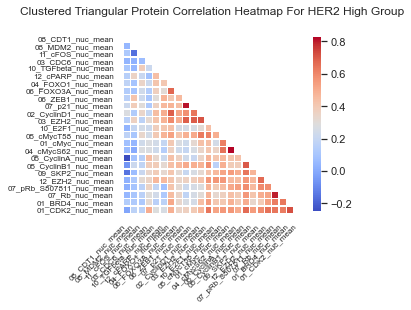

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform



# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = data_high.corr()

# Step 2: Perform hierarchical clustering
# Use 1 - correlation as the distance metric
distance_matrix = 1 - correlation_matrix
Z = linkage(squareform(distance_matrix.values, checks=False), method='average')

# Step 3: Reorder the matrix according to the clustering result
dendro = dendrogram(Z, labels=correlation_matrix.index, no_plot=True)
reordered_matrix = correlation_matrix.iloc[dendro['leaves'], dendro['leaves']]

# Step 4: Mask the upper triangle of the reordered matrix
mask = np.triu(np.ones_like(reordered_matrix, dtype=bool))

# Step 5: Plot the clustered triangular heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(
    reordered_matrix,
    cmap='coolwarm',
    mask=mask,
    annot=False,
    linewidths=0.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={"shrink": 0.8}
)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Add a title
plt.title('Clustered Triangular Protein Correlation Heatmap For HER2 High Group', pad=20)

#plt.savefig("high_her2_correlation_heatmap_nuclear.svg", dpi=300, bbox_inches='tight')  # Save as SVG


# Display the plot
plt.show()


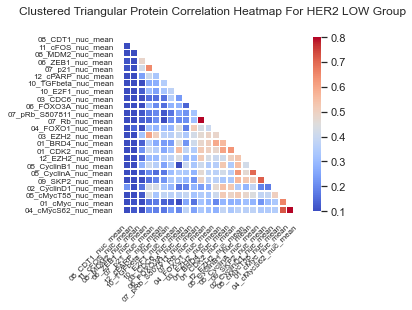

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform


# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = data_low.corr()

# Step 2: Perform hierarchical clustering
# Use 1 - correlation as the distance metric
distance_matrix = 1 - correlation_matrix
Z = linkage(squareform(distance_matrix.values, checks=False), method='average')

# Step 3: Reorder the matrix according to the clustering result
dendro = dendrogram(Z, labels=correlation_matrix.index, no_plot=True)
reordered_matrix = correlation_matrix.iloc[dendro['leaves'], dendro['leaves']]

# Step 4: Mask the upper triangle of the reordered matrix
mask = np.triu(np.ones_like(reordered_matrix, dtype=bool))

# Step 5: Plot the clustered triangular heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(
    reordered_matrix,
    cmap='coolwarm',
    mask=mask,
    annot=False,
    linewidths=0.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={"shrink": 0.8},
    vmin=0.1,  # Minimum value for color mapping
    vmax=0.8   # Maximum value for color mapping
)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Add a title
plt.title('Clustered Triangular Protein Correlation Heatmap For HER2 LOW Group', pad=20)

#plt.savefig("low_her2_correlation_heatmap_nuclear.svg", dpi=300, bbox_inches='tight')  # Save as SVG


# Display the plot
plt.show()


# Try on your Own: 

## Observations:
1. **HER2 High**:
   - Exhibits higher levels of correlations between proteins.
   - Suggests a more coordinated or networked behavior among proteins.
2. **HER2 Low**:
   - Shows lower levels of correlations.
   - Indicates less coordinated activity or greater variability between protein behaviors.

## Questions to Consider:
1. **Biological Interpretation**:
   - Why might HER2 high cells exhibit stronger correlations between proteins?
   - Does this suggest increased signaling activity, tighter regulation, or specific pathways being activated in HER2 high cells?
   - Why might HER2 low cells have weaker correlations? Could this indicate disrupted pathways or less coordinated cellular behavior?

2. **Pathway Analysis**:
   - Are the proteins that show strong correlations in HER2 high cells part of known pathways or processes?
   - Do HER2 high and HER2 low cells share any similarly correlated protein pairs, or are the correlation patterns completely distinct?

3. **Variance and Localization**:
   - Do proteins with strong correlations in HER2 high cells show high variance or localized expression (e.g., nucleus vs. cytoplasm)?
   - Are there specific compartments where the differences between HER2 high and HER2 low are more pronounced?

4. **Cellular State**:
   - Could the differences in correlation patterns reflect differences in cellular states (e.g., proliferation, stress, or signaling)?

## Suggested Follow-Up Activities:
1. **Identify Key Protein Pairs**:
   - Identify the top 5 most strongly correlated protein pairs in HER2 high cells and compare them to HER2 low cells. Are there overlaps or completely distinct pairs?

2. **Pathway Enrichment**:
   - Use pathway enrichment analysis (e.g., Reactome or KEGG) to investigate whether highly correlated proteins in HER2 high cells are enriched in specific pathways.

3. **Compartmental Differences**:
   - Investigate if HER2 high and HER2 low cells exhibit distinct correlation patterns within specific compartments (e.g., nuclear vs. cytoplasmic proteins).

4. **Protein Hubs**:
   - Identify proteins that act as "hubs" (highly correlated with multiple other proteins) in HER2 high cells. Are these hubs also present in HER2 low cells?

5. **Correlation Spread**:
   - Compare the overall distribution of correlation coefficients between HER2 high and HER2 low cells. Does HER2 high have more extreme correlations (positive or negative)?


## Deliverables:
- A brief summary of key observations and hypotheses based on the correlation plots.
- Visualizations to highlight key differences (e.g., top correlated pairs, hub proteins).
- A discussion of potential biological mechanisms behind the differences in correlation patterns.


_____________________


## Question 6: Construct Protein Networks for HER2 High vs. HER2 Low Cells

### Goal:
Investigate how protein networks differ between HER2 high and HER2 low cells.

### Approach:
1. **Data Preparation**:
   - Separate the dataset into HER2 high and HER2 low groups.
   - Ensure the same set of proteins is included in both groups for fair comparison.

2. **Network Construction**:
   - Use **correlation** or **mutual information** to define edges between proteins.
   - Use tools like **NetworkX** to construct and visualize the networks for each group.
   - The **correlation** or **mutual information** will focus on protein abundances.

3. **Network Analysis**:
   - Analyze and compare key network properties for HER2 high and HER2 low groups:
     - **Degree Centrality**: Which proteins have the most connections?
     - **Betweenness Centrality**: Which proteins serve as critical "bridges" in the network?
     - **Clustering Coefficient**: Are there tightly connected clusters in the network?
   - Identify hub proteins and determine if their roles differ between HER2 high and HER2 low cells.

---

### Questions to Explore:
1. **Network Structure**:
   - How does the overall structure of the HER2 high network differ from the HER2 low network?
   - Are there more or fewer connections (edges) in the HER2 high network?

2. **Key Proteins**:
   - Which proteins act as hubs in HER2 high cells? Are these the same hubs in HER2 low cells?
   - Are there proteins with significant differences in centrality measures between the two networks?

3. **Biological Relevance**:
   - Do the hub proteins in the HER2 high network align with known HER2-related pathways?
   - Are there novel or unexpected proteins in the HER2 high network that might warrant further investigation?

4. **Cluster Comparisons**:
   - Are there tightly connected clusters in the HER2 high network? Do these clusters exist in the HER2 low network?
   - What biological processes might these clusters represent?

---

### Suggested Tools:
- **Pandas** for data manipulation.
- **Scipy** or **sklearn** for correlation and mutual information calculations.
- **NetworkX** for network construction and analysis.
- **Matplotlib** or **Plotly** for network visualization.

---

### Deliverables:
1. Visualizations of the protein correlation networks for HER2 high and HER2 low groups.
2. A summary of key differences in network properties (e.g., centrality, clustering coefficient).
3. Biological interpretation of the results, with a focus on identifying unique features of HER2 high cells.


## Step 1: Data Preparation

We will:
- Select the relevant protein columns (e.g., those with `*_nuc_mean`).
- Separate the data into two groups: **High HER2** and **Low HER2**.
- Melt the data to make it easier to visualize and analyze using tools like Seaborn.
- Rename columns for clarity and consistency.


In [23]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define the protein names of interest and include the HER2 group classification
protein_names = selection + ['HER2_Group']

# Use the df_cell dataset
data = df_cell

# Separate data into High HER2 and Low HER2 groups
high_her2_pvalues = data[data.HER2_Group == 'High HER2']  # Filter High HER2 group
low_her2_pvalues = data[data.HER2_Group == 'Low HER2']    # Filter Low HER2 group

# Combine both groups into a single DataFrame with relevant protein columns
df = pd.concat([high_her2_pvalues, low_her2_pvalues])
df = df[protein_names]

# Melt the DataFrame for easier visualization and analysis
melted_df = df.melt(id_vars=['HER2_Group'], var_name='Protein', value_name='Expression')

# Display the first few rows of the melted DataFrame
print("Melted DataFrame for analysis:")
melted_df.head()


Melted DataFrame for analysis:


,HER2_Group,Protein,Expression
0,High HER2,01_cMyc_nuc_mean,-0.274626
1,High HER2,01_cMyc_nuc_mean,0.545061
2,High HER2,01_cMyc_nuc_mean,-0.572976
3,High HER2,01_cMyc_nuc_mean,-0.495165
4,High HER2,01_cMyc_nuc_mean,-0.113178


In [24]:
# Select columns containing 'nuc_mean'
jj = [i for i in df.columns if i in selection] # 'selecton' is the selection of mainly nuclear proteins

# Separate data into high and low HER2 groups
high_her2_df = df[df['HER2_Group'] == 'High HER2']
low_her2_df = df[df['HER2_Group'] == 'Low HER2']

# Rename columns to shorten them
high_df = high_her2_df[jj]
high_df.columns = [i.split('_')[1] for i in high_df.columns]
high_df.columns = ['cMyc', 'BRD4', 'CDK2', 'CyclinD1', 'CDC6', 'EZH2_1', 'cMycS62', 'FOXO1',
                   'cMycT58', 'CyclinA', 'CyclinB1', 'FOXO3A', 'ZEB1', 'pRb', 'Rb', 'p21',
                   'CDT1', 'MDM2', 'SKP2', 'TGFbeta', 'E2F1', 'cFOS', 'EZH2_2', 'cPARP']
low_df = low_her2_df[jj]
low_df.columns = [i.split('_')[1] for i in low_df.columns]
low_df.columns = ['cMyc', 'BRD4', 'CDK2', 'CyclinD1', 'CDC6', 'EZH2_1', 'cMycS62', 'FOXO1',
                  'cMycT58', 'CyclinA', 'CyclinB1', 'FOXO3A', 'ZEB1', 'pRb', 'Rb', 'p21',
                  'CDT1', 'MDM2', 'SKP2', 'TGFbeta', 'E2F1', 'cFOS', 'EZH2_2', 'cPARP']


In [24]:
high_df.head()

,cMyc,BRD4,CDK2,CyclinD1,CDC6,EZH2_1,cMycS62,FOXO1,cMycT58,CyclinA,CyclinB1,FOXO3A,ZEB1,pRb,Rb,p21,CDT1,MDM2,SKP2,TGFbeta,E2F1,cFOS,EZH2_2,cPARP
index_column,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,-0.217049,1.356144,0.482767,-0.536020,-0.987532,0.243860,-0.927233,-0.002703,0.406510,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,-0.434054,-0.922134,0.300361,0.626121,0.519019
cell_31,0.545061,0.302935,0.875525,-0.523494,0.560125,0.388460,0.624579,-0.696834,0.404130,0.377436,0.506497,0.032809,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,-0.004364,-0.017985,0.250767,1.478013,0.019616
cell_52,-0.572976,-0.730484,-0.241799,-1.112824,0.666691,-0.573224,-0.321901,-1.132744,-0.474945,-0.864963,-0.763451,-0.606523,-0.524979,0.298706,-1.456988,-0.469322,-0.731447,-0.068177,0.320168,-0.721937,-0.240088,-0.434629,0.611801,-0.823589
cell_70,-0.495165,-1.028390,-0.464403,-0.331493,0.187237,-0.030267,-0.509239,-0.872779,-0.265677,-0.898469,0.641768,-0.309283,0.356119,-0.915906,-0.622274,0.747636,-0.320279,0.069460,-0.295044,-0.176602,-0.747359,0.005017,-0.130655,0.087914
cell_89,-0.113178,0.091115,-0.129332,-0.146598,0.550189,0.387248,-0.207807,-0.413124,0.219866,0.036978,0.372320,0.210634,0.704888,0.275901,0.021384,1.016665,0.741232,0.021952,0.906976,0.450721,0.422467,0.759595,0.697668,0.334607


## Step 2: Construct Protein Correlation Networks

Using correlation values, we will construct Protein networks for high HER2 and low HER2 groups.
Edges between proteins are created when their correlation exceeds a given threshold.


In [25]:
import networkx as nx


# Function to create a correlation network
def create_network(data, threshold=0.5):
    corr = data.corr()
    G = nx.Graph()
    for col in corr.columns:
        for idx in corr.index:
            if col != idx and abs(corr.at[idx, col]) > threshold:
                G.add_edge(col, idx, weight=corr.at[idx, col])
    return G

# Create networks for high and low HER2 groups
high_her2_network = create_network(high_df)
low_her2_network = create_network(low_df)


## Step 3: Analyze Network Properties

We will calculate and compare key network properties:
- **Degree Centrality**: Number of direct connections each protein has.
- **Betweenness Centrality**: Importance of a protein as a "bridge" in the network.
- **Clustering Coefficient**: Likelihood that a protein's neighbors are also connected.
- **Eigenvector Centrality**: Influence of a protein in the network based on its connections.


In [26]:
# Function to analyze network properties
def analyze_network(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    clustering_coefficient = nx.clustering(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    return degree_centrality, betweenness_centrality, clustering_coefficient, eigenvector_centrality

# Analyze networks
high_degree, high_betweenness, high_clustering, high_eigenvector = analyze_network(high_her2_network)
low_degree, low_betweenness, low_clustering, low_eigenvector = analyze_network(low_her2_network)


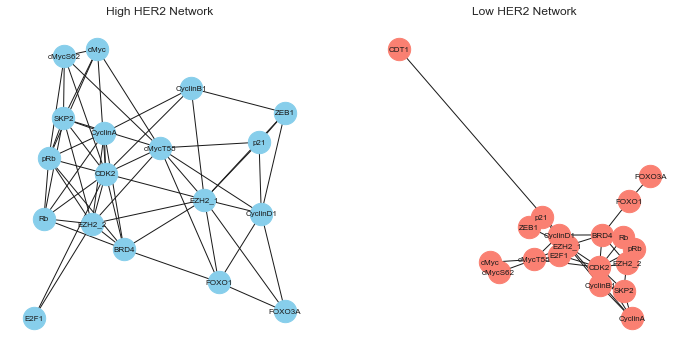

In [27]:
# Plot networks
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(high_her2_network, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title('High HER2 Network')
plt.subplot(122)
nx.draw(low_her2_network, with_labels=True, node_color='salmon', node_size=500, font_size=8)
plt.title('Low HER2 Network')
plt.show()

## Final Step: Statistical Comparison of Network Metrics

### Goal:
We will compare the network metrics between **High HER2** and **Low HER2** groups using the Mann-Whitney U test. This test is appropriate for comparing non-parametric distributions.

### Metrics to Compare:
1. **Degree Centrality**: Measures the number of connections a protein has.
2. **Betweenness Centrality**: Indicates the importance of a protein as a bridge in the network.
3. **Clustering Coefficient**: Reflects the likelihood of forming clusters with neighboring proteins.

### Objective:
Determine if there are statistically significant differences in these metrics between the High HER2 and Low HER2 networks.


In [28]:
# Convert network metrics to DataFrame for better visualization
def network_metrics_to_df(degree, betweenness, clustering, group):
    df = pd.DataFrame({
        'Protein': list(degree.keys()),
        'Degree Centrality': list(degree.values()),
        'Betweenness Centrality': list(betweenness.values()),
        'Clustering Coefficient': list(clustering.values()),
        'Group': group
    })
    return df

high_metrics_df = network_metrics_to_df(high_degree, high_betweenness, high_clustering, 'High HER2')
low_metrics_df = network_metrics_to_df(low_degree, low_betweenness, low_clustering, 'Low HER2')

In [29]:
from scipy.stats import mannwhitneyu

# Combine network metrics for both groups
metrics_df = pd.concat([high_metrics_df, low_metrics_df])

# Function to compare metrics using Mann-Whitney U test
def compare_metrics(df, metric):
    high_values = df[df['Group'] == 'High HER2'][metric]
    low_values = df[df['Group'] == 'Low HER2'][metric]
    stat, p_value = mannwhitneyu(high_values, low_values)
    return p_value

# Perform statistical comparisons for each metric
degree_p_value = compare_metrics(metrics_df, 'Degree Centrality')
betweenness_p_value = compare_metrics(metrics_df, 'Betweenness Centrality')
clustering_p_value = compare_metrics(metrics_df, 'Clustering Coefficient')

# Display the results
print(f"Degree Centrality p-value: {degree_p_value:.4f}")
print(f"Betweenness Centrality p-value: {betweenness_p_value:.4f}")
print(f"Clustering Coefficient p-value: {clustering_p_value:.4f}")


Degree Centrality p-value: 0.0002
Betweenness Centrality p-value: 0.5922
Clustering Coefficient p-value: 0.1055


## Interpretation of Results

### 1. **Degree Centrality p-value**:
- **Significance**: The p-value is significantly less than 0.05.
- **Implication**:
  - There is a statistically significant difference in degree centrality between high HER2 and low HER2 networks.
  - **Proteins in the high HER2 network are connected to more other proteins compared to those in the low HER2 network.**
  - This suggests that certain proteins might act as hubs in the high HER2 network, potentially playing critical roles in the biological processes associated with high HER2 expression.

---

### 2. **Betweenness Centrality p-value**:
- **Significance**: The p-value is greater than 0.05.
- **Implication**:
  - There is no statistically significant difference in betweenness centrality between high and low HER2 networks.
  - **The proteins serving as bridges or bottlenecks in the network do not differ significantly between the two groups.**
  - This suggests that the overall network flow and communication paths are similar between high and low HER2 conditions.

---

### 3. **Clustering Coefficient p-value**:
- **Significance**: The p-value is greater than 0.05.
- **Implication**:
  - There is no statistically significant difference in clustering coefficient between high and low HER2 networks.
  - **The tendency of proteins to form tightly connected groups or clusters is similar across the two conditions.**
  - This suggests that local network structures, such as protein complexes or functional modules, do not differ significantly between high and low HER2 networks.

---


# Advanced Modules for Biostatistics Students

This notebook outlines several advanced modules to explore the HER2 dataset further. These modules focus on network analysis, machine learning, and statistical testing to uncover meaningful insights.

---


## Module 1: Advanced Network Analysis

### Goal:
Dive deeper into the structure and properties of high and low HER2 networks.

### Tasks:
1. **Identify Hub Proteins**:
   - Determine proteins with the highest degree centrality in each network.
   - Compare the hubs between high HER2 and low HER2 networks.

2. **Community Detection**:
   - Use methods like Louvain or modularity optimization to detect clusters or functional modules in each network.

3. **Robustness Analysis**:
   - Simulate the removal of hub proteins and observe how network properties (e.g., connectivity, path length) change.

4. **Other Network Metrics**:
   - Compute other network metrics like eigenvector centrality, betweenness, reachability and influence zones. Determine which proteins are significant for each.

### Tools:
- Libraries: `NetworkX`, `igraph`, or `PyTorch Geometric`.
- Visualization: `Matplotlib` or `Plotly`.

### Deliverables:
- A detailed report on the structural differences between high HER2 and low HER2 networks.
- Insights into the role of specific proteins in network stability and communication.

---


## Module 2: Feature Selection for Classification

### Goal:
Build a machine learning model to classify cells into high HER2 or low HER2 groups based on protein expression.

### Tasks:
1. **Feature Selection**:
   - Use statistical tests (e.g., t-tests, Mann-Whitney U tests) to identify proteins that differ significantly between groups.
   - Apply feature selection techniques (e.g., LASSO, Recursive Feature Elimination) to narrow down the most predictive proteins.

2. **Train and Evaluate Classifiers**:
   - Train models like logistic regression, random forest, or support vector machines (SVM).
   - Evaluate model performance using metrics such as accuracy, precision, recall, and F1 score.

### Tools:
- Libraries: `scikit-learn`, `XGBoost`, or `TensorFlow`.

### Deliverables:
- A trained predictive model.
- An interpretation of the most predictive proteins and their potential biological roles.

---


## Module 3: Dimensionality Reduction and Visualization

### Goal:
Explore the high-dimensional structure of the dataset and visualize subpopulation differences.

### Tasks:
1. **Dimensionality Reduction**:
   - Apply PCA, t-SNE, or UMAP to reduce the dimensionality of the dataset.

2. **Visualization**:
   - Create scatter plots or 3D visualizations to observe the separation between high HER2 and low HER2 groups.

3. **Protein Contribution**:
   - Investigate which proteins contribute most to the reduced dimensions (e.g., loadings in PCA).

### Tools:
- Libraries: `scikit-learn`, `seaborn`, `matplotlib`.

### Deliverables:
- Visualizations showing the separation between subpopulations.
- A summary of the most influential proteins contributing to the observed differences.

---


## Module 4: Statistical Hypothesis Testing and Model Evaluation

### Goal:
Validate findings and ensure reproducibility by applying rigorous statistical methods.

### Tasks:
1. **Bootstrap Analysis**:
   - Assess the stability of key results (e.g., network metrics, classification model performance) using bootstrapping.

2. **Multiple Testing Correction**:
   - Apply corrections like Bonferroni or FDR to account for multiple hypothesis testing.

3. **Cross-Validation**:
   - Use k-fold cross-validation to evaluate machine learning models and ensure they generalize well to unseen data.

### Tools:
- Libraries: `statsmodels`, `scipy`, or custom scripts.

### Deliverables:
- A statistically validated summary of findings.
- Cross-validated performance metrics for machine learning models.

---


## Module 5: Causal Inference

### Goal:
Explore causal relationships between HER2 expression and protein network behavior.

### Tasks:
1. **Causal Structure Learning**:
   - Use algorithms like PC, GES, or FCI to infer causal relationships between HER2 status and protein interactions.

2. **Do-Calculus**:
   - Apply interventions (e.g., simulate changes in HER2 status) to assess how the network responds.

3. **Counterfactual Analysis**:
   - Evaluate what might happen in low HER2 cells if HER2 expression were increased, and vice versa.

### Tools:
- Libraries: `causal-learn`, `DoWhy`, or `pgmpy`.

### Deliverables:
- A causal graph illustrating the relationships between HER2 status and key proteins.
- Hypotheses about potential mechanisms driving HER2-related changes.
- Simulated outcomes based on interventions.

---

### Why Causal Inference?
Causal inference provides a deeper understanding of the mechanisms underlying observed correlations. This module encourages students to think beyond association and explore how changes in one variable might influence the system as a whole.


________________